In [2]:
import ntplib
import time

import tqdm

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.dates as mdates

import allantools

import pandas as pd
from scipy.stats import skew

In [276]:
jila_data = pd.read_csv('Freq_B_3_250624_1.txt', comment='#', delim_whitespace=True, header=None, 
                        names=['Day', 'Time', 'S', 'Si', 'Rb', 'H', 'None'],
                        dtype={'Day': int, 'Time': np.float64, 'S': int, 'Si': np.clongdouble, 'Rb': np.clongdouble, 'H': np.clongdouble, 'None': np.float64})

years = jila_data['Day'] // 10000 + 2000
months = (jila_data['Day'] // 100) % 100
days = jila_data['Day'] % 100

hours = jila_data['Time'] // 10000
minutes = (jila_data['Time'] // 100) % 100
seconds = jila_data['Time'] % 100

jila_data['Date'] = pd.to_datetime({
    'year': years,
    'month': months,
    'day': days,
    'hour': hours,
    'minute': minutes,
    'second': seconds
})
jila_data.drop(columns=['Day', 'Time'], inplace=True)

interval = 0.1 # seconds
jila_data['Si_Phase'] = np.cumsum(jila_data['Si'] * interval)
jila_data['Rb_Phase'] = np.cumsum(jila_data['Rb'] * interval)
jila_data['H_Phase'] = np.cumsum(jila_data['H'] * interval)

jila_data.head()

/var/folders/0f/8jqt02nd3wz72b28z311t0d00000gn/T/ipykernel_1347/1734265995.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  jila_data = pd.read_csv('Freq_B_3_250624_1.txt', comment='#', delim_whitespace=True, header=None,


TypeError: the dtype complex128 is not supported for parsing

8

In [224]:
average_si_freq = jila_data['Si'].mean()
print(f"Average Si frequency: {average_si_freq} Hz")

jila_data['Si_Deviation'] = jila_data['Si'] - average_si_freq
jila_data['Si_Phase_Deviation'] = np.cumsum(jila_data['Si_Deviation'] * interval)
jila_data['Si_Time'] = jila_data['Si_Phase'] / average_si_freq
jila_data['Si_Time_Deviation'] = jila_data['Si_Phase_Deviation'] / average_si_freq

jila_data.head()

Average Si frequency: 995532.6897452829 Hz


,S,Si,Rb,H,None,Date,Si_Phase,Rb_Phase,H_Phase,Si_Time,Rb_Time,H_Time,Si_Deviation,Si_Phase_Deviation,Si_Time_Deviation
0,0,995532.689695,1.000000e+07,5.000000e+06,5.370589e+07,2025-06-24 00:00:00.096,99553.268969,1.000000e+06,5.000000e+05,0.1,0.1,0.1,-0.000051,-0.000005,-5.091492e-12
1,0,995532.689378,1.000000e+07,5.000000e+06,3.446915e+04,2025-06-24 00:00:00.171,199106.537907,2.000000e+06,1.000000e+06,0.2,0.2,0.2,-0.000367,-0.000042,-4.198706e-11
2,0,995532.689681,1.000000e+07,5.000000e+06,1.156124e+07,2025-06-24 00:00:00.271,298659.806875,3.000000e+06,1.500000e+06,0.3,0.3,0.3,-0.000064,-0.000048,-4.845802e-11
3,0,995532.689885,1.000000e+07,5.000000e+06,5.367296e+07,2025-06-24 00:00:00.371,398213.075864,4.000000e+06,2.000000e+06,0.4,0.4,0.4,0.000139,-0.000034,-3.446707e-11
4,0,995532.689889,1.000000e+07,5.000000e+06,5.350751e+07,2025-06-24 00:00:00.471,497766.344853,5.000000e+06,2.500000e+06,0.5,0.5,0.5,0.000143,-0.000020,-2.005462e-11


In [225]:
jila_data.iloc[-1]

S                                              0
Si                                 995532.689886
Rb                               10000000.007434
H                                 5000000.000061
None                             11578668.925676
Date                  2025-06-24 23:59:59.919000
Si_Phase                      86013924840.726135
Rb_Phase                     863999000648.153564
H_Phase                      431999500000.002441
Si_Time                                  86399.9
Rb_Time                                  86399.9
H_Time                                   86399.9
Si_Deviation                            0.000141
Si_Phase_Deviation                     -0.000009
Si_Time_Deviation                           -0.0
Name: 863998, dtype: object

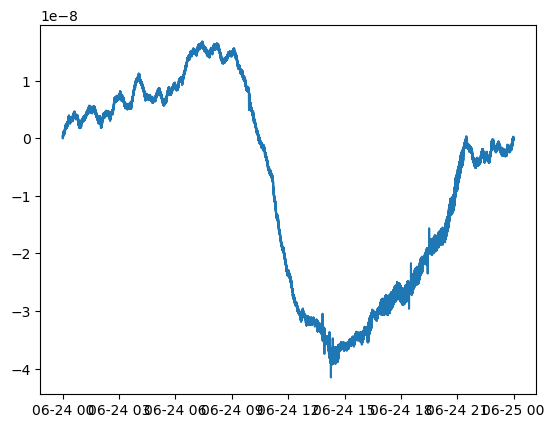

In [226]:
plt.plot(jila_data['Date'], jila_data['Si_Time_Deviation'], label='Si Time Deviation')

In [238]:
phase_freq_data = pd.read_csv('PhaseFreq_B_4_250710_1.txt', comment='#', delim_whitespace=True, header=None, 
                              names=['Day', 'Time', 'S', 'Si_Phase', 'Rb_Phase', 'H_Phase', 'None_Phase', 'Si_Freq', 'Rb_Freq', 'H_Freq', 'None_Freq'])

years = phase_freq_data['Day'] // 10000 + 2000
months = (phase_freq_data['Day'] // 100) % 100
days = phase_freq_data['Day'] % 100
hours = phase_freq_data['Time'] // 10000
minutes = (phase_freq_data['Time'] // 100) % 100
seconds = phase_freq_data['Time'] % 100
phase_freq_data['Date'] = pd.to_datetime({
    'year': years,
    'month': months,
    'day': days,
    'hour': hours,
    'minute': minutes,
    'second': seconds
})
phase_freq_data.drop(columns=['Day', 'Time', 'None_Phase', 'None_Freq'], inplace=True)

phase_freq_data['Si_Phase_From_Freq'] = np.cumsum(phase_freq_data['Si_Freq'] * interval)
phase_freq_data['Rb_Phase_From_Freq'] = np.cumsum(phase_freq_data['Rb_Freq'] * interval)
phase_freq_data['H_Phase_From_Freq'] = np.cumsum(phase_freq_data['H_Freq'] * interval)

phase_freq_data['Si_Phase_Deviation'] = phase_freq_data['Si_Phase'] - phase_freq_data['Si_Phase_From_Freq']
phase_freq_data['Rb_Phase_Deviation'] = phase_freq_data['Rb_Phase'] - phase_freq_data['Rb_Phase_From_Freq']
phase_freq_data['H_Phase_Deviation'] = phase_freq_data['H_Phase'] - phase_freq_data['H_Phase_From_Freq']

phase_freq_data['Si_Phase_Error'] = phase_freq_data['Si_Phase_Deviation'] - phase_freq_data['Si_Phase_Deviation'].mean()
phase_freq_data['Rb_Phase_Error'] = phase_freq_data['Rb_Phase_Deviation'] - phase_freq_data['Rb_Phase_Deviation'].mean()
phase_freq_data['H_Phase_Error'] = phase_freq_data['H_Phase_Deviation'] - phase_freq_data['H_Phase_Deviation'].mean()

phase_freq_data['Si_Time_Error'] = phase_freq_data['Si_Phase_Error'] / average_si_freq
phase_freq_data['Rb_Time_Error'] = phase_freq_data['Rb_Phase_Error'] / average_rb_freq
phase_freq_data['H_Time_Error'] = phase_freq_data['H_Phase_Error'] / average_h_freq

phase_freq_data.head()

/var/folders/0f/8jqt02nd3wz72b28z311t0d00000gn/T/ipykernel_1347/2627792877.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  phase_freq_data = pd.read_csv('PhaseFreq_B_4_250710_1.txt', comment='#', delim_whitespace=True, header=None,


,S,Si_Phase,Rb_Phase,H_Phase,Si_Freq,Rb_Freq,H_Freq,Date,Si_Phase_From_Freq,Rb_Phase_From_Freq,H_Phase_From_Freq,Si_Phase_Deviation,Rb_Phase_Deviation,H_Phase_Deviation,Si_Phase_Error,Rb_Phase_Error,H_Phase_Error,Si_Time_Error,Rb_Time_Error,H_Time_Error
0,0,2.157004e+07,1.784972e+08,5.120260e+08,995532.690020,1.000000e+07,5.000000e+06,2025-07-10 12:12:44.443,99553.269002,1.000000e+06,5.000000e+05,2.147049e+07,1.774972e+08,5.115260e+08,3.725290e-09,1.788139e-07,1.788139e-07,3.742007e-15,1.788139e-14,3.576279e-14
1,0,2.166959e+07,1.794972e+08,5.125260e+08,995532.690149,1.000000e+07,5.000000e+06,2025-07-10 12:12:44.542,199106.538017,2.000000e+06,1.000000e+06,2.147049e+07,1.774972e+08,5.115260e+08,3.725290e-09,2.086163e-07,1.788139e-07,3.742007e-15,2.086163e-14,3.576279e-14
2,0,2.176915e+07,1.804972e+08,5.130260e+08,995532.690259,1.000000e+07,5.000000e+06,2025-07-10 12:12:44.643,298659.807043,3.000000e+06,1.500000e+06,2.147049e+07,1.774972e+08,5.115260e+08,3.725290e-09,2.086163e-07,1.788139e-07,3.742007e-15,2.086163e-14,3.576279e-14
3,1,2.186870e+07,1.814972e+08,5.135260e+08,995532.689842,1.000000e+07,5.000000e+06,2025-07-10 12:12:44.743,398213.076027,4.000000e+06,2.000000e+06,2.147049e+07,1.774972e+08,5.115260e+08,0.000000e+00,1.788139e-07,1.788139e-07,0.000000e+00,1.788139e-14,3.576279e-14
4,0,2.196825e+07,1.824972e+08,5.140260e+08,995532.689796,1.000000e+07,5.000000e+06,2025-07-10 12:12:44.843,497766.345007,5.000000e+06,2.500000e+06,2.147049e+07,1.774972e+08,5.115260e+08,0.000000e+00,1.788139e-07,2.384186e-07,0.000000e+00,1.788139e-14,4.768372e-14


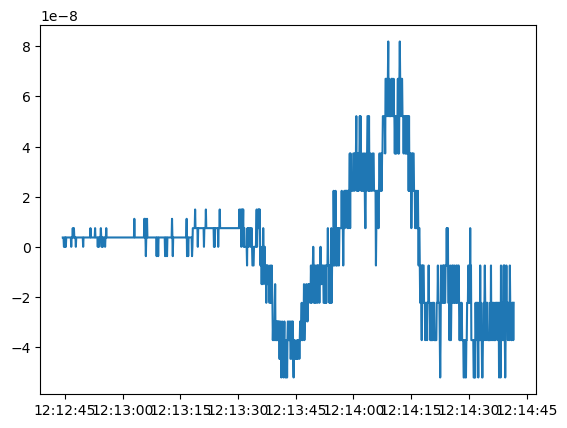

In [260]:
plt.plot(phase_freq_data['Date'], phase_freq_data['Si_Phase_Error'], label='Si Phase Error')
# plt.plot(phase_freq_data['Date'], phase_freq_data['Rb_Phase_Error'], label='Rb Phase Error')
# plt.plot(phase_freq_data['Date'], phase_freq_data['H_Phase_Error'], label='H Phase Error')

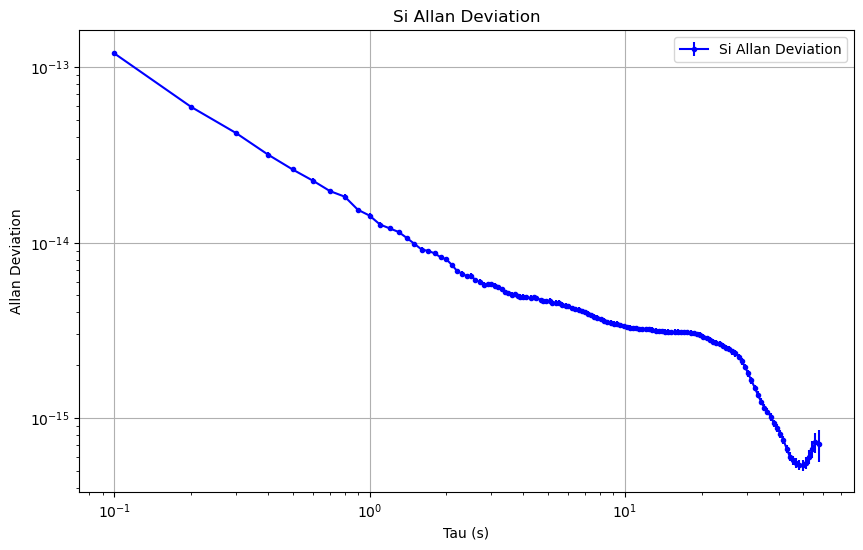

In [246]:
Si_adev = allantools.oadev(phase_freq_data['Si_Time_Error'].values, rate=10, taus=0.1*np.logspace(0, 20, 481, base=2))

plt.figure(figsize=(10, 6))
plt.errorbar(Si_adev[0], Si_adev[1], yerr=Si_adev[2], fmt='.', linestyle='-', color='b', label='Si Allan Deviation')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tau (s)')
plt.ylabel('Allan Deviation')
plt.title('Si Allan Deviation')
plt.legend()
plt.grid()
plt.show()

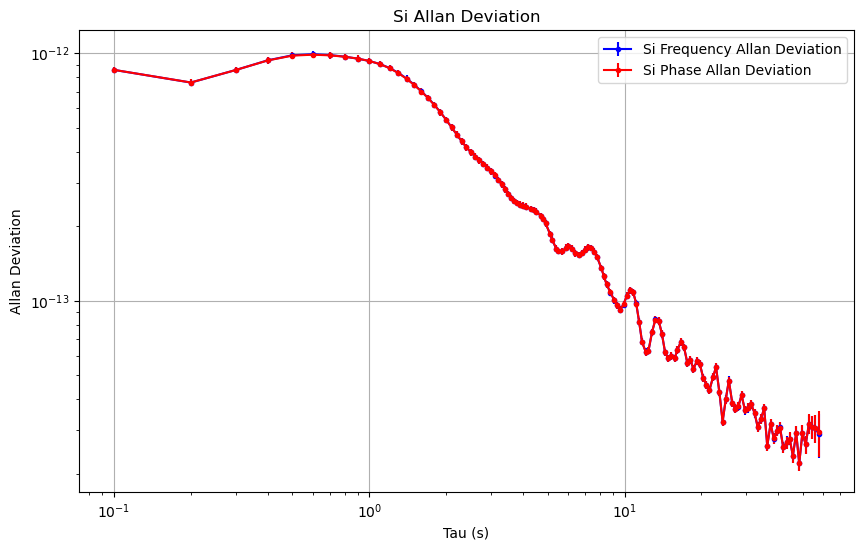

In [258]:
si_freq_adev = allantools.oadev(phase_freq_data['Si_Freq'].values/250e6, data_type='freq', rate=10, taus=0.1*np.logspace(0, 20, 481, base=2))
si_phase_adev = allantools.oadev(phase_freq_data['Si_Phase'].values/250e6, rate=10, taus=0.1*np.logspace(0, 20, 481, base=2))

plt.figure(figsize=(10, 6))
plt.errorbar(si_freq_adev[0], si_freq_adev[1], yerr=si_freq_adev[2], fmt='.', linestyle='-', color='b', label='Si Frequency Allan Deviation')
plt.errorbar(si_phase_adev[0], si_phase_adev[1], yerr=si_phase_adev[2], fmt='.', linestyle='-', color='r', label='Si Phase Allan Deviation')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tau (s)')
plt.ylabel('Allan Deviation')
plt.title('Si Allan Deviation')
plt.legend()
plt.grid()
plt.show()

In [3]:
client = ntplib.NTPClient()


# offset is for far behind the system clock is relative to the NTP server
# positive values mean the system clock is behind the NTP server

In [183]:
pack = client.request('utcnist.colorado.edu', version=3, timeout=5)

In [185]:
print(f'offset: {pack.offset} seconds\nDelay: {pack.delay} seconds\nReference Time: {pack.ref_time}\nOriginate Time: {pack.orig_time}\nTransmit Time: {pack.tx_time}\nReceive Time: {pack.recv_time}\nDestination Time: {pack.dest_time}')
print(f'Root Delay: {pack.root_delay} seconds\nRoot Dispersion: {pack.root_dispersion} seconds\nStratum: {pack.stratum}\nLeap Indicator: {pack.leap}\nPoll Interval: {pack.poll} seconds\nPrecision: {pack.precision} seconds')

offset: 0.002367734909057617 seconds
Delay: 0.0034689903259277344 seconds
Reference Time: 1752078336.0
Originate Time: 1752078349.74399
Transmit Time: 1752078349.7480946
Receive Time: 1752078349.7480922
Destination Time: 1752078349.7474613
Root Delay: 0.000244140625 seconds
Root Dispersion: 0.00048828125 seconds
Stratum: 1
Leap Indicator: 0
Poll Interval: 13 seconds
Precision: -29 seconds


In [170]:
data = pd.read_csv('offsetlogger.csv', comment='#', names=['txctime', 'txtime', 'localctime', 'localtime', 'offset', 'sigoffset'])
data.head()

,txctime,txtime,localctime,localtime,offset,sigoffset
0,Tue Jul 8 12:08:20 2025,1.751998e+09,Tue Jul 8 12:08:20 2025,1.751998e+09,0.012366,0.000002
1,Tue Jul 8 12:08:25 2025,1.751998e+09,Tue Jul 8 12:08:25 2025,1.751998e+09,0.012197,0.000009
2,Tue Jul 8 12:08:31 2025,1.751998e+09,Tue Jul 8 12:08:31 2025,1.751998e+09,0.012158,0.000006
3,Tue Jul 8 12:08:35 2025,1.751998e+09,Tue Jul 8 12:08:35 2025,1.751998e+09,0.012123,0.000006
4,Tue Jul 8 12:08:40 2025,1.751998e+09,Tue Jul 8 12:08:40 2025,1.751998e+09,0.012049,0.000010


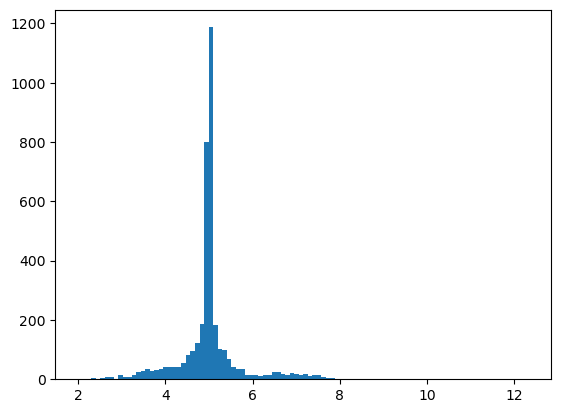

In [171]:
diffs = np.array(data['txtime'][1:]) - data['txtime'][:-1]  # time between NTP requests
plt.hist(diffs, bins=100)
plt.show()

<ErrorbarContainer object of 3 artists>

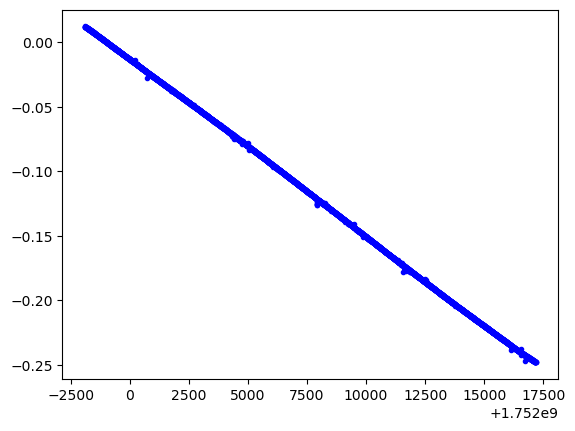

In [172]:
plt.errorbar(data['txtime'], data['offset'], yerr=data['sigoffset'], fmt='.', linestyle='-', color='b', label='NTP Offset')

In [173]:
from numpy.polynomial.polynomial import Polynomial as P

def remove_outliers(data, weights=None, times=None, level=0.5):
    if times is not None:
        if len(data) != len(times):
            raise ValueError("Data and times must have the same length.")
    if weights is not None:
        if len(data) != len(weights):
            raise ValueError("Data and weights must have the same length.")
    if times is not None:
        trend = P.fit(times, data, 3, w=weights)
        deviations = data - trend(times)
    else:
        trend = P.fit(np.arange(len(data)), data, 3, w=weights)
        deviations = data - trend(np.arange(len(data)))

    qts = np.quantile(deviations, [0.25, 0.75])
    iqr = qts[1] - qts[0]
    lower_bound = qts[0] - level * iqr
    upper_bound = qts[1] + level * iqr
    
    trim_data = data[(deviations >= lower_bound) & (deviations <= upper_bound)]

    if times is not None:
        times = times[(deviations >= lower_bound) & (deviations <= upper_bound)]
        if weights is not None:
            weights = weights[(deviations >= lower_bound) & (deviations <= upper_bound)]
            return trim_data, times, weights
        else :
            return trim_data, times
    else:
        return trim_data

adjusted_offset = np.zeros_like(data['offset'])

window = 3000  # seconds
for i in range(0, len(data)):
    if i<30:
        adjusted_offset[i] = data['offset'][i]
        continue

    current_time = data['txtime'][i]

    past_data = data[(data['txtime'] < current_time) & (data['txtime'] >= current_time - window)]
    past_data.loc[past_data['sigoffset'] <= 0, 'sigoffset'] = 0.5e-6  # Remove non-positive sigoffsets

    try:
        past_offset, past_times, past_weights = remove_outliers(past_data['offset'].values, times=past_data['txtime'].values, weights=1/np.pow(past_data['sigoffset'].values,2), level=1)
    except Exception as e:
        print(f"Error processing data at index {i}: {e}")
        print(min(past_data['sigoffset'][past_data['sigoffset'] > 0]))

    if len(past_data) < 5:
        adjusted_offset[i] = data['offset'][i]
        continue

    offset_fit = P.fit(past_times, past_offset, 3, w=past_weights)
    adjusted_offset[i] = data['offset'][i] - offset_fit(current_time)

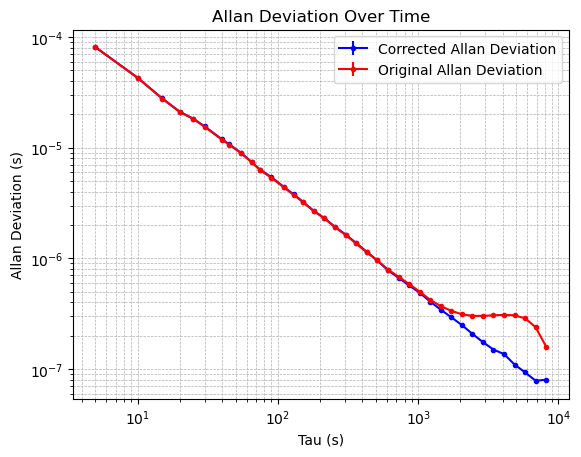

In [174]:
corr_adev = allantools.oadev(adjusted_offset[30:], rate=0.2, taus=np.logspace(0, 15, 61, base=2))
orig_adev = allantools.oadev(data['offset'][30:], rate=0.2, taus=np.logspace(0, 15, 61, base=2))


plt.errorbar(corr_adev[0], corr_adev[1], yerr=corr_adev[2], fmt='.', linestyle='-', color='b', label='Corrected Allan Deviation')
plt.errorbar(orig_adev[0], orig_adev[1], yerr=orig_adev[2], fmt='.', linestyle='-', color='r', label='Original Allan Deviation')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tau (s)')
plt.ylabel('Allan Deviation (s)')
plt.title('Allan Deviation Over Time')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

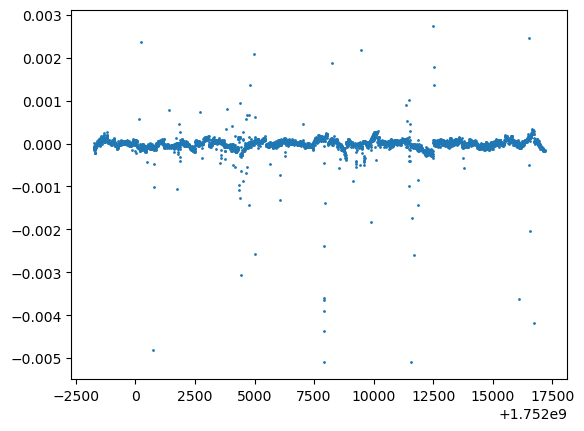

In [175]:
plt.plot(data['txtime'][30:], adjusted_offset[30:], 'o', markersize=1, label='No Outliers')

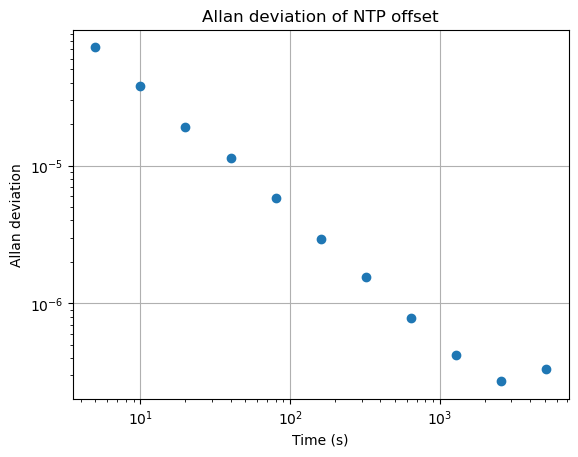

In [53]:
adev = allantools.oadev(data['offset'], rate=0.2)

plt.errorbar(adev[0], adev[1], yerr=adev[2], fmt='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel('Allan deviation')
plt.title('Allan deviation of NTP offset')
plt.grid()
plt.show()

Range: 2.114096, Bin width: 0.0005000227057710501, Number of bins: 4228


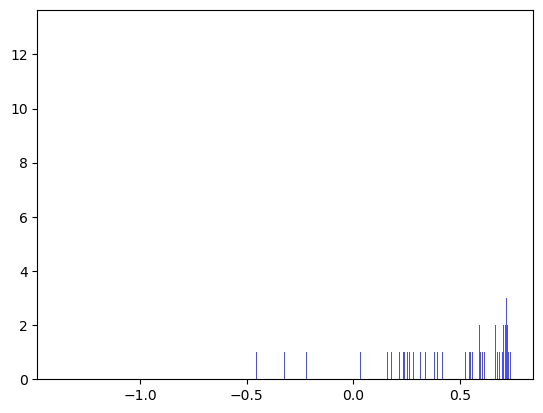

In [116]:
dat = data['offset'].iloc[-300:]
ra = dat.max() - dat.min()
binwidth = 0.0005
nbins = int(ra / binwidth)
print(f"Range: {ra}, Bin width: {ra/nbins}, Number of bins: {nbins}")

plt.hist(dat, bins=nbins, color='blue', alpha=0.7)

plt.show()

In [ ]:
def estimator(dat):
    while abs(skew(dat)) > 1.0:
        n = len(dat)
        ra = dat.max() - dat.min()
        nbins = int(np.sqrt(n))

        hist = np.histogram(dat, bins=nbins)


        likely = hist[0] > n/nbins
        mins = hist[1][:-1][likely]
        maxs = hist[1][1:][likely]
        counts = hist[0][likely]

        for i in range(len(mins)-1, 0, -1):
            if mins[i] == maxs[i-i]:
                mins = np.delete(mins, i)
                maxs = np.delete(maxs, i)
                counts[i-i] += counts[i]
                counts = np.delete(counts, i)

        maxindex = np.argmax(counts)
        min = mins[maxindex]
        max = maxs[maxindex]
        count = counts[maxindex]

        dat = dat[(dat >= min) & (dat <= max)]

    return (np.mean(dat), np.std(dat)/np.sqrt(len(dat)))

<ErrorbarContainer object of 3 artists>

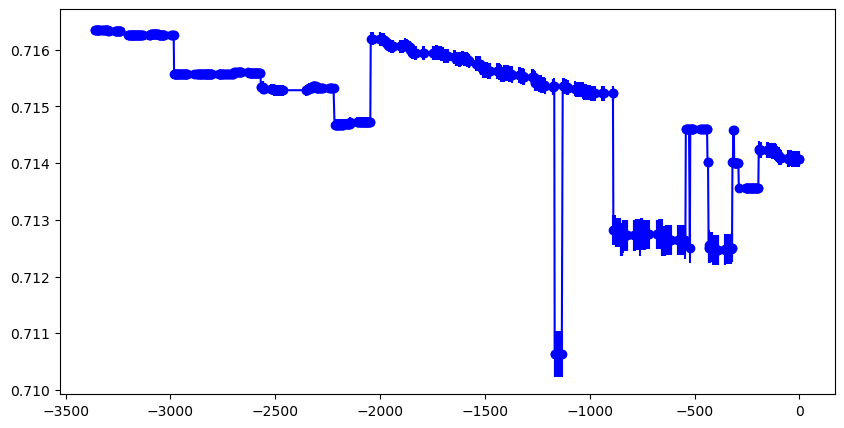

In [179]:
width = 600

txtimes = []
meanoffsets = []
stdoffsets = []

for i in range(width, len(data['offset'])):
    dat = data['offset'].iloc[i-width:i]
    mean, std = estimator(dat)

    txtimes.append(data['txtime'].iloc[i])
    meanoffsets.append(mean)
    stdoffsets.append(std)

txtimes = np.array(txtimes)
meanoffsets = np.array(meanoffsets)
stdoffsets = np.array(stdoffsets)

reltimes = txtimes-txtimes[-1]

fig, ax = plt.subplots(figsize=(10, 5))

plt.errorbar(reltimes, meanoffsets, yerr=stdoffsets, fmt='o', linestyle='-', color='b', label='NTP Offset')


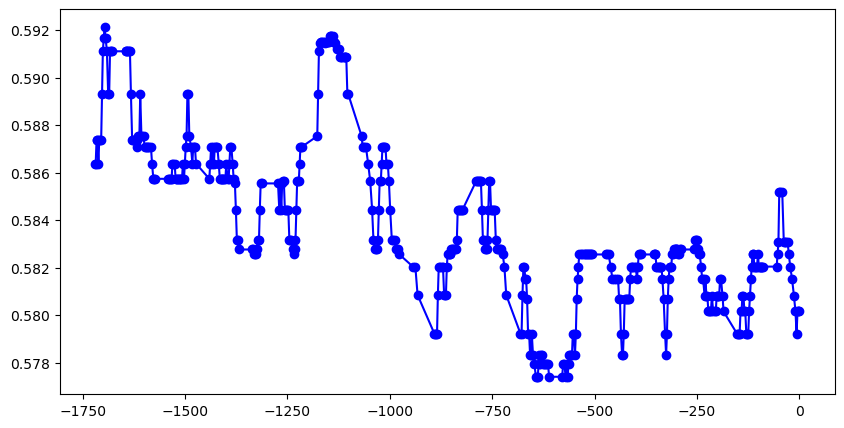

In [164]:
width = 1000

txtimes = []
meanoffsets = []
stdoffsets = []

for i in range(width, len(data['offset'])):
    dat = data['offset'].iloc[i-width:i]
    median = np.median(dat)

    txtimes.append(data['txtime'].iloc[i])
    meanoffsets.append(median)

txtimes = np.array(txtimes)
meanoffsets = np.array(meanoffsets)
stdoffsets = np.array(stdoffsets)

reltimes = txtimes-txtimes[-1]

fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(reltimes, meanoffsets, marker='o', linestyle='-', color='b', label='NTP Offset')


/var/folders/0f/8jqt02nd3wz72b28z311t0d00000gn/T/ipykernel_47447/2344224260.py:15: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update, interval=1000)


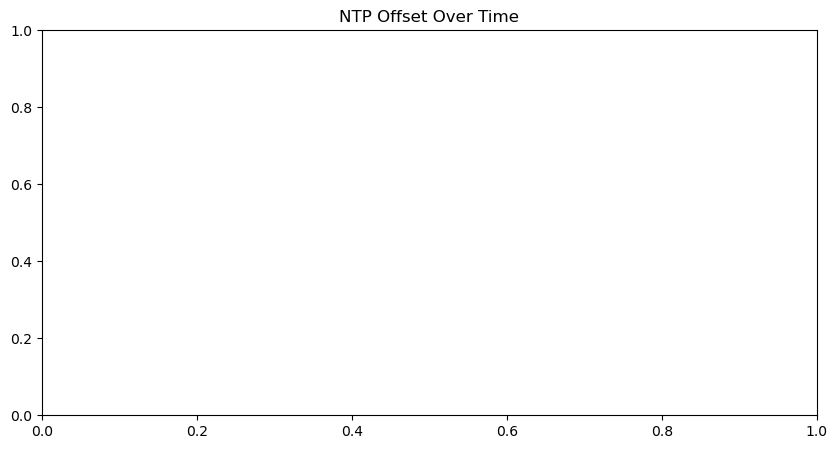

In [18]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax1.set_title('NTP Offset Over Time')

def update(frame):
    data = pd.read_csv('offsetlogger.csv', comment='#', names=['txctime', 'txtime', 'localctime', 'localtime', 'offset'])

    times = data['txtime']
    reltimes = times - times.iloc[-1]
    offsets = data['offset']

    ax1.clear()
    ax1.plot(reltimes, offsets, marker='o', linestyle='-', color='b', label='NTP Offset')

ani = animation.FuncAnimation(fig, update, interval=1000)
plt.show()

In [9]:
%matplotlib inline

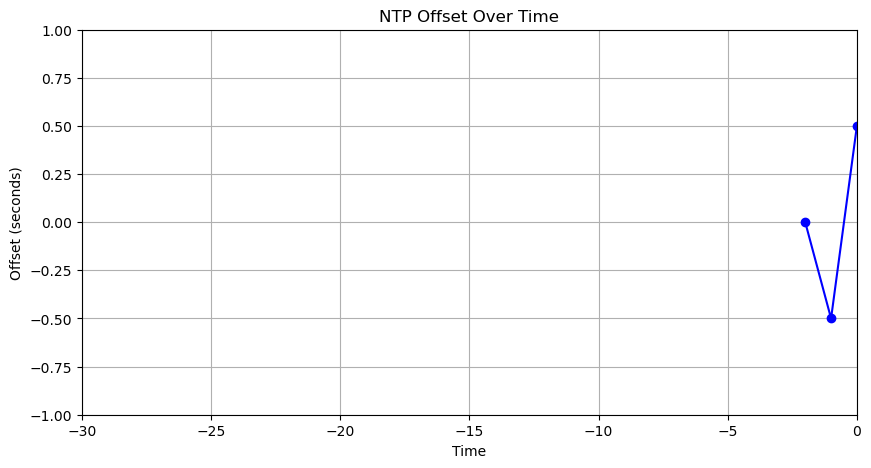

KeyboardInterrupt: 

In [ ]:


fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title('NTP Offset Over Time')

ax.set_xlabel('Time')
ax.set_ylabel('Offset (seconds)')
ax.grid(True)
# Set up the plot

ax.set_xlim(left=-30, right=0)  # Set x-axis limits
ax.set_ylim(bottom=-1, top=1)  # Set y-axis limits


ax.plot([-2,-1,0], [0,-0.5,0.5], marker='o', linestyle='-', color='b', label='NTP Offset')

plt.show()  # Show the initial plot


# Fetch NTP data and plot it in real-time

for i in range(30):
    start = time.time_ns()  # Get the current time in nanoseconds
    response = client.request('time.nist.gov', version=3)
    offset = response.offset  # This will give you the offset in seconds
    end = time.time_ns()  # Get the end time in nanoseconds
    elapsed = end - start  # Calculate the elapsed time in nanoseconds
    txtime = response.tx_time

    times = np.append(times, txtime)
    reltimes = times - times[-1]
    offsets = np.append(offsets, offset)

    for line in ax.lines:
        line.set_xdata(reltimes)
        line.set_ydata(offsets)
    
    fig.canvas.draw()  # Redraw the figure

    plt.show()

    # Update the plot with the new data

    time.sleep(1)  # Sleep for 1 second to avoid overwhelming the server

In [7]:
print(reltimes)
print(offsets)

[-2.46180248  0.        ]
[-0.68230247 -0.20154238]


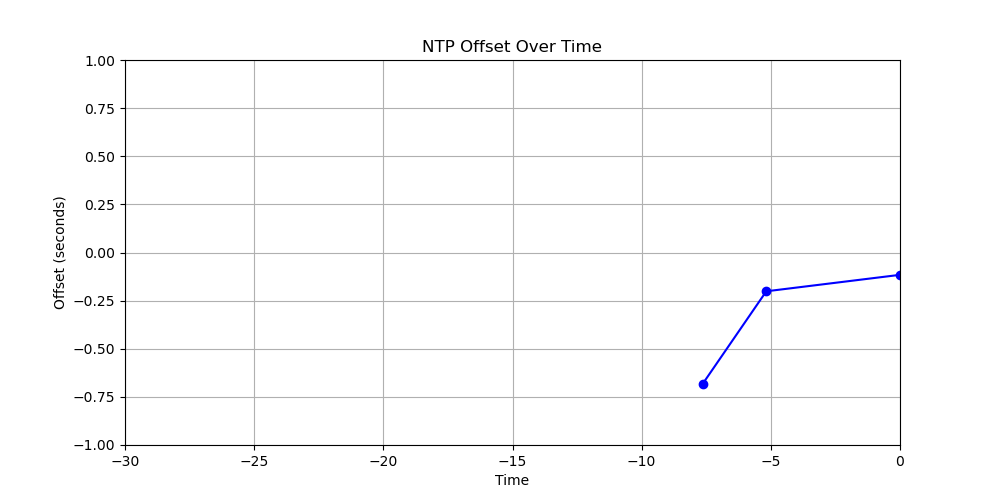

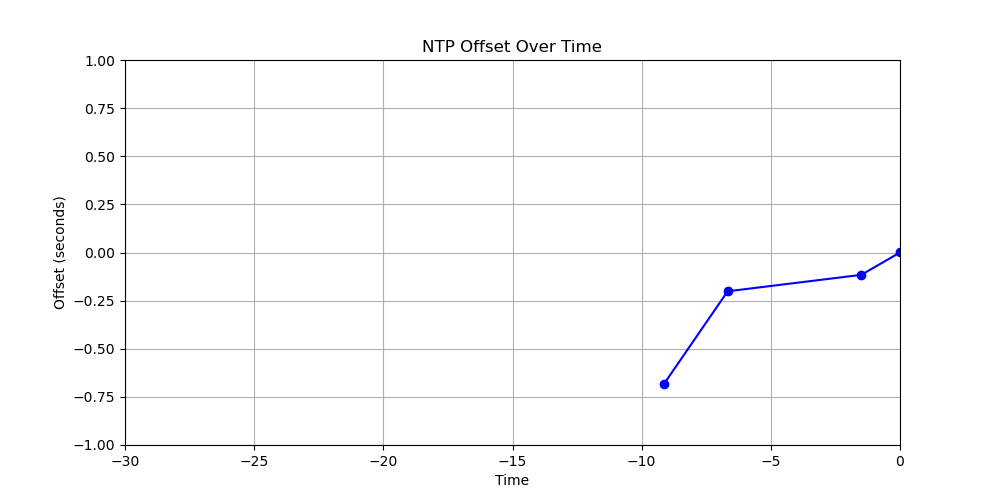

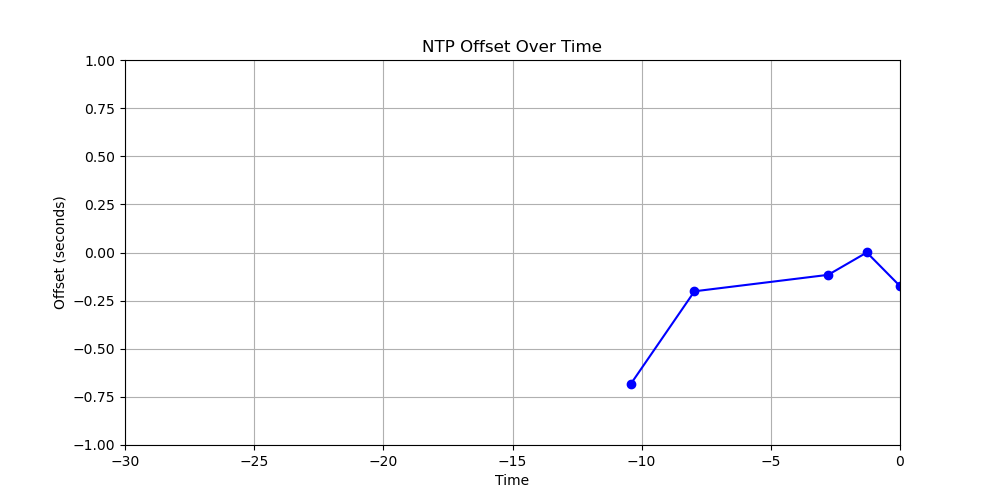

KeyboardInterrupt: 

In [8]:
# Clear previous lines except the first one (if any)
if len(ax.lines) > 1:
    ax.lines = [ax.lines[0]]

# Simulate real-time updating of a single line in a loop
for _ in range(5):
    response = client.request('time.nist.gov', version=3)
    offset = response.offset
    txtime = response.tx_time

    times = np.append(times, txtime)
    reltimes = times - times[-1]
    offsets = np.append(offsets, offset)

    # If no line exists, create one; otherwise, update the existing line
    if len(ax.lines) == 0:
        line, = ax.plot(reltimes, offsets, marker='o', linestyle='-', color='b', label='NTP Offset')
    else:
        ax.lines[0].set_xdata(reltimes)
        ax.lines[0].set_ydata(offsets)

    ax.relim()
    ax.autoscale_view()
    plt.draw()
    plt.pause(1)